
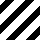
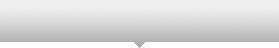
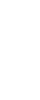
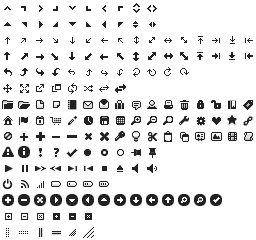
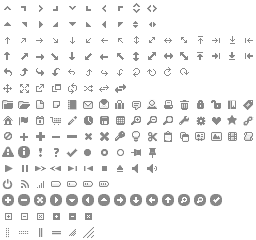
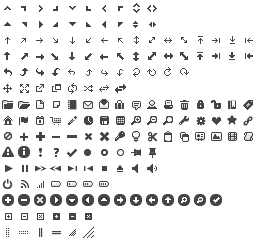
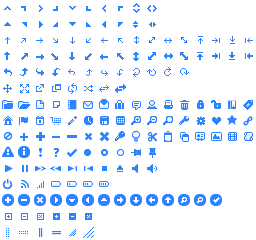
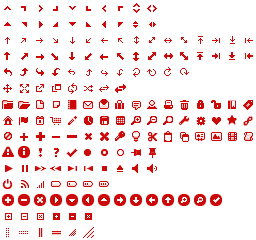
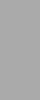
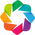
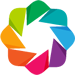
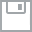
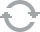
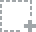
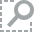
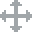
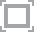
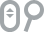

In [1]:
import pandas as pd
import numpy as np

from bokeh.models import ColumnDataSource, Patches, HoverTool, TapTool, Plot, Range1d
from bokeh.plotting import figure, show, output_notebook

output_notebook()

In [2]:
## Read from hdf if you have it installed

#map_data = pd.read_hdf('data/province_map_data.hdf', 'df')
#map_data.head()

In [3]:
## Read from json and convert to np arrays

map_data = pd.read_json('data/province_map_data.json')
def convert_none_to_np_nan(r):
    r['xs'] = np.array(r['xs'], dtype=float)
    r['ys'] = np.array(r['ys'], dtype=float)
    return r
map_data = map_data.apply(convert_none_to_np_nan, axis=1)
map_data.head()

,alpha,code,name_en,name_zh,xs,ys
0,AH,340000,Anhui,安徽省,"[116.838997837, 116.847731154, 116.906177199, ...","[34.3892190619, 34.3897616643, 34.4008979359, ..."
1,BJ,110000,Beijing,北京市,"[117.072730341, 117.087613153, 117.099705438, ...","[40.6735383163, 40.6750110947, 40.6792227241, ..."
10,HA,410000,Henan,河南省,"[111.01050866, 111.016368035, 111.034678582, 1...","[19.68378327, 19.678045966, 19.642238674, 19.6..."
11,HB,420000,Hubei,湖北省,"[118.648736281, 118.594320566, 118.514308354, ...","[39.044651167, 38.972197399, 38.919445031, 38...."
12,HB,420000,Hubei,湖北省,"[111.557408075, 111.568931919, 111.577406854, ...","[32.5920419385, 32.5951941999, 32.6012920188, ..."


In [4]:
def make_map(source, x_range=[-180, 180], y_range=[-90, 90], plot_width=600):
    
    aspect_ratio = (x_range[1] - x_range[0]) / (y_range[1] - y_range[0])
    plot_height = int(plot_width / aspect_ratio)

    unselected_color = '#fff7bc'
    selected_color = '#fec44f'
    outline_color = '#993404'
    
    polys = Patches(xs='xs', 
                    ys='ys',
                    fill_color=unselected_color, 
                    line_color=outline_color)

    selected_polys = Patches(xs='xs', 
                             ys='ys',
                             fill_color=selected_color, 
                             line_color=outline_color)
    

    p = figure(title='',
               plot_width=plot_width, 
               plot_height=plot_height, 
               x_range=x_range, 
               y_range=y_range,
               outline_line_color='white',
               tools='box_zoom, tap, reset')

    p.add_glyph(source, polys, selection_glyph=selected_polys, nonselection_glyph=polys)
    ttip = [("name", "@name_en"), ("code", "@code"), ("alpha", "@alpha")]
    p.add_tools(HoverTool(tooltips=ttip))

    return p

In [5]:
map_source = ColumnDataSource(map_data)
china = make_map(map_source, x_range=[70, 140], y_range=[10, 60])
show(china)